In [19]:
#Muhammad Daffa Saifullah
#1103204024
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [23]:
df = pd.read_csv(r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\week 6\data\data_by_genres.csv")
dfyear = pd.read_csv(r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\week 6\data\data_by_year.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [4]:
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [5]:
df.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [13]:
df.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'cluster'],
      dtype='object')

In [24]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(dfyear, x='year', y=sound_features)
fig.show()

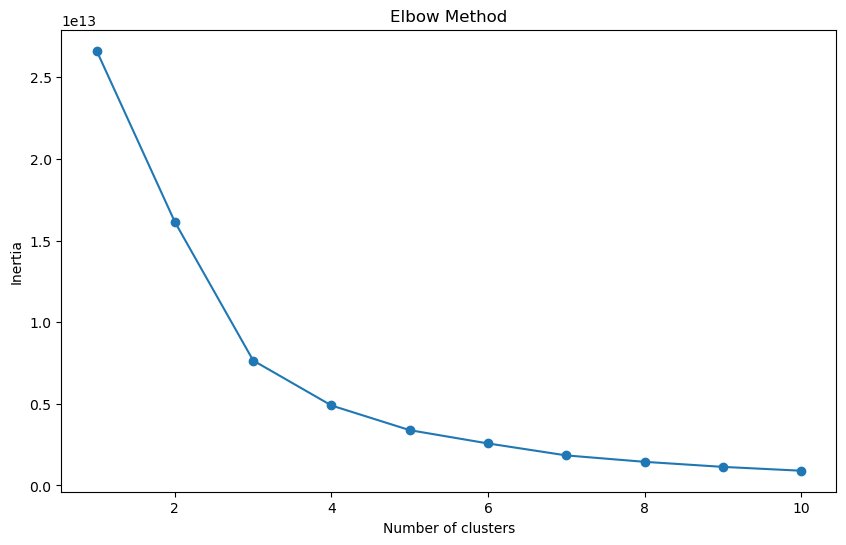

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membuat list kosong untuk menampung nilai inersia
inertia = []

# Mengambil kolom yang diperlukan
X = df[['mode','acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'cluster']]

# Melakukan perulangan untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


For k = 2, Silhouette Score = 0.6487731661730411
For k = 3, Silhouette Score = 0.6039202519941382
For k = 4, Silhouette Score = 0.5129622051413866
For k = 5, Silhouette Score = 0.529285904572986
For k = 6, Silhouette Score = 0.5293212217937966
For k = 7, Silhouette Score = 0.5257466812914894
For k = 8, Silhouette Score = 0.5254419835833206
For k = 9, Silhouette Score = 0.5281495779141135
For k = 10, Silhouette Score = 0.5285296727814286


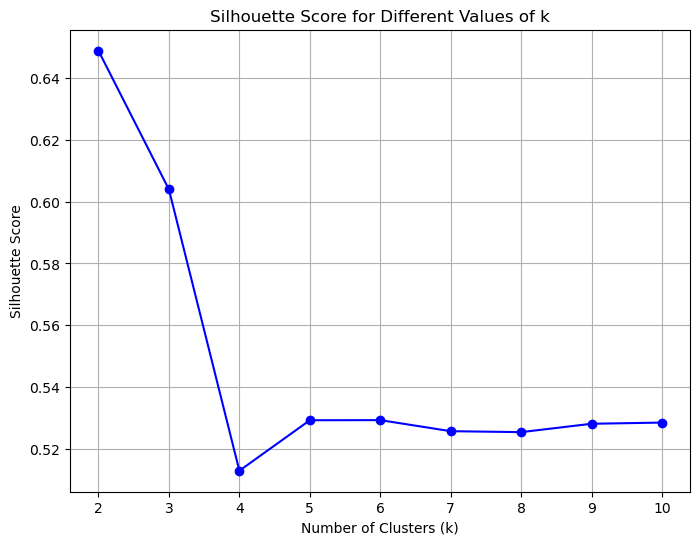

In [20]:
# Memilih kolom yang akan digunakan
data = df[['mode','acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'cluster']]

# Inisialisasi daftar untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Menghitung Silhouette Score untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, Silhouette Score = {silhouette_avg}")

# Menampilkan hasil
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [21]:
# Memilih kolom yang akan digunakan
data = df[['mode','acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'cluster']]

# Inisialisasi daftar untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = []

# Menghitung Calinski-Harabasz Index untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    chi = calinski_harabasz_score(data, labels)
    chi_scores.append(chi)
    print(f"For k = {k}, Calinski-Harabasz Index = {chi}")

# Menampilkan hasil
k_values = range(2, 11)
print("Calinski-Harabasz Index Scores:")
print(chi_scores)


For k = 2, Calinski-Harabasz Index = 1932.5537912597176
For k = 3, Calinski-Harabasz Index = 3683.7867114096402
For k = 4, Calinski-Harabasz Index = 4392.784788169601
For k = 5, Calinski-Harabasz Index = 5094.338962793792
For k = 6, Calinski-Harabasz Index = 5551.952200200814
For k = 7, Calinski-Harabasz Index = 6665.410803544011
For k = 8, Calinski-Harabasz Index = 7379.077190196152
For k = 9, Calinski-Harabasz Index = 8316.759530645833
For k = 10, Calinski-Harabasz Index = 9403.133984757413
Calinski-Harabasz Index Scores:
[1932.5537912597176, 3683.7867114096402, 4392.784788169601, 5094.338962793792, 5551.952200200814, 6665.410803544011, 7379.077190196152, 8316.759530645833, 9403.133984757413]


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = df.select_dtypes(np.number)
cluster_pipeline.fit(X)
df['cluster'] = cluster_pipeline.predict(X)

In [15]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = df['genres']
projection['cluster'] = df['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\daffa\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.113052
[t-SNE] KL divergence after 1000 iterations: 1.388784
